In [1]:
import intake
import iris
import iris.quickplot as qplt

/opt/conda/lib/python3.6/site-packages/intake/source/discovery.py:39: UserWarning: Plugin name collision for "netcdf" from
    /opt/conda/lib/python3.6/site-packages/intake_iris/netcdf.py
and
    /opt/conda/lib/python3.6/site-packages/intake_xarray/netcdf.py
Keeping plugin from first location.
  % (plugin_name, orig_path, new_path))


In [2]:
ncic = intake.cat.ncic_daily_land_obs.read_chunked()
ncic

[<iris 'Cube' of air_temperature / (degC) (time: 20454; projection_y_coordinate: 290; projection_x_coordinate: 180)>,
<iris 'Cube' of air_temperature / (degC) (time: 20454; projection_y_coordinate: 290; projection_x_coordinate: 180)>,
<iris 'Cube' of air_temperature / (degC) (time: 20454; projection_y_coordinate: 290; projection_x_coordinate: 180)>,
<iris 'Cube' of lwe_thickness_of_precipitation_amount / (mm) (time: 21184; projection_y_coordinate: 290; projection_x_coordinate: 180)>]

In [3]:
[rainfall] = ncic.extract(iris.Constraint(name='lwe_thickness_of_precipitation_amount'))

In [4]:
mean_rainfall = rainfall.collapsed(['latitude', 'longitude'], iris.analysis.MEAN)

/opt/conda/lib/python3.6/site-packages/iris/cube.py:3174: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/opt/conda/lib/python3.6/site-packages/iris/coords.py:1206: UserWarning: Collapsing a multi-dimensional coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/opt/conda/lib/python3.6/site-packages/iris/coords.py:1206: UserWarning: Collapsing a multi-dimensional coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


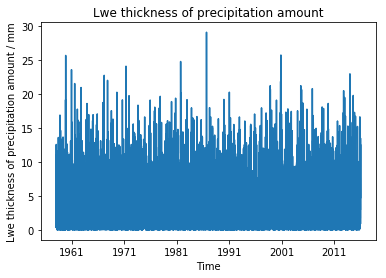

In [5]:
qplt.plot(mean_rainfall)